In [14]:
import pandas as pd

In [15]:
stroke_data = pd.read_csv('brain_stroke.csv')

stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [20]:
import pandas as pd

#Load data
stroke_data = pd.read_csv('brain_stroke.csv')

stroke_data.head()

#Data description summary
summary = {
    "Metric": ["# Rows", "# Columns"],
    "Value": [stroke_data.shape[0], stroke_data.shape[1]]
}
desc_df = pd.DataFrame(summary)

dtypes = stroke_data.dtypes.rename("Data Type").to_frame()
missing = stroke_data.isnull().sum().rename("Missing").to_frame()

display(desc_df)
display(dtypes)
display(missing)


,Metric,Value
0,# Rows,4981
1,# Columns,11


,Data Type
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


,Missing
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


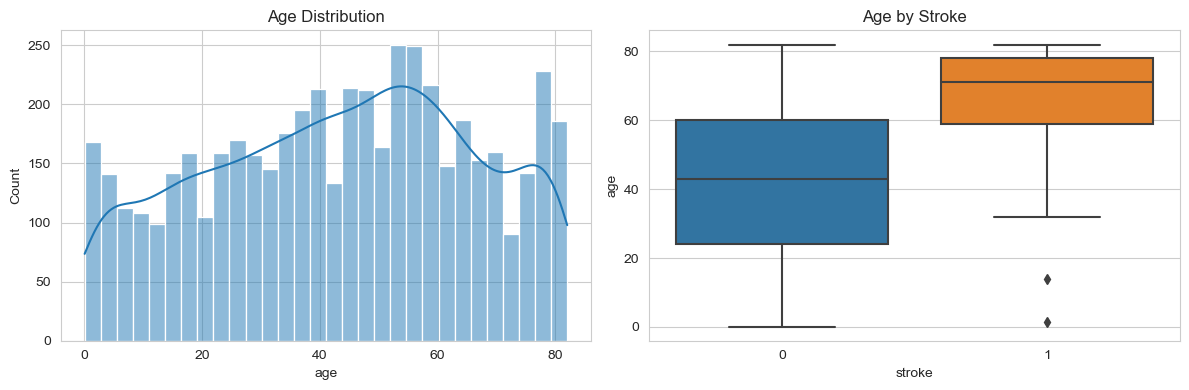

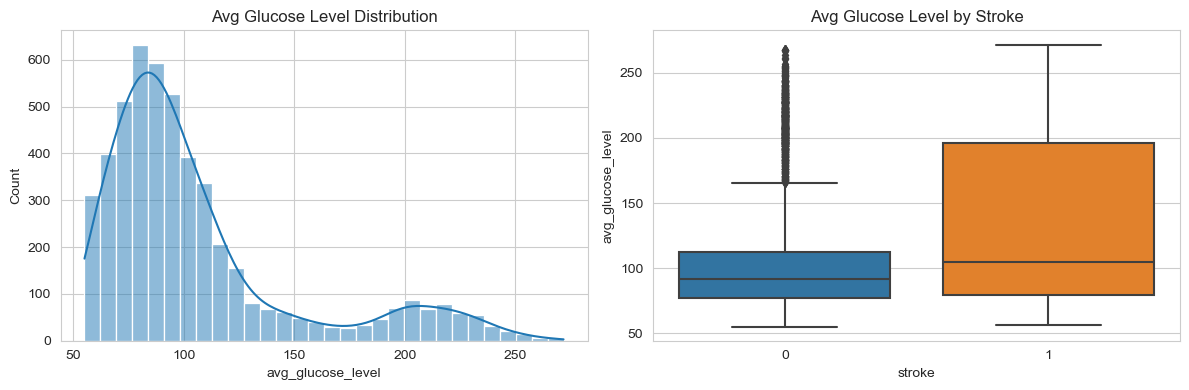

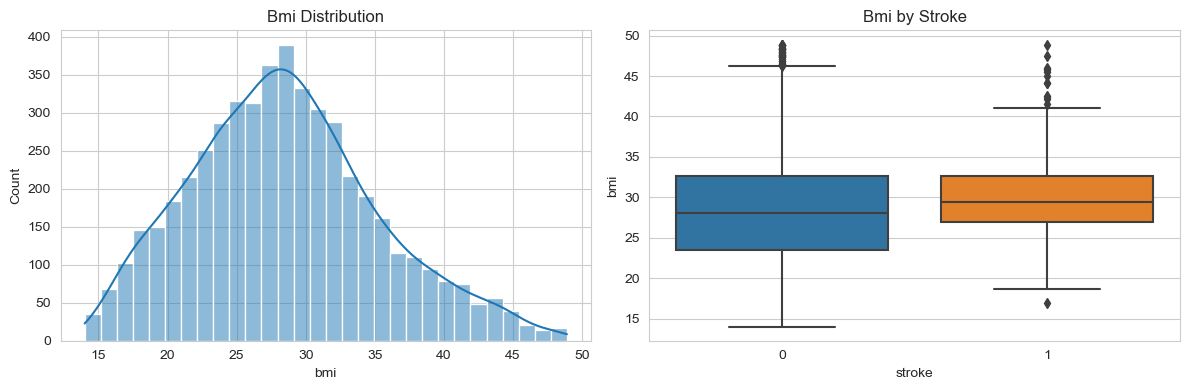

In [23]:
# Step 5: Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stroke_data = pd.read_csv('brain_stroke.csv')
stroke_data.columns = stroke_data.columns.str.strip().str.lower()

sns.set_style("whitegrid")

cont_cols = ['age', 'avg_glucose_level', 'bmi']
for col in cont_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    # Histogram + KDE
    sns.histplot(stroke_data[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"{col.replace('_',' ').title()} Distribution")
    # Boxplot by stroke outcome
    sns.boxplot(x='stroke', y=col, data=stroke_data, ax=axes[1])
    axes[1].set_title(f"{col.replace('_',' ').title()} by Stroke")
    plt.tight_layout()
    plt.show()

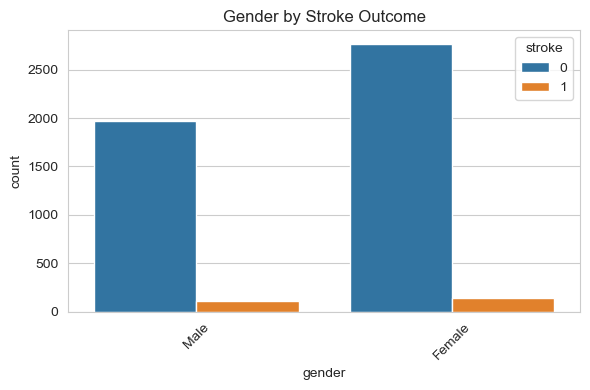

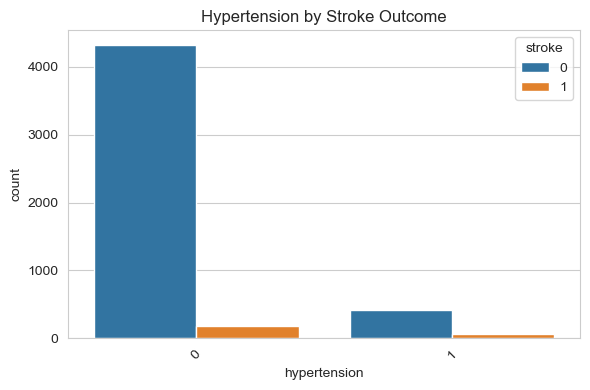

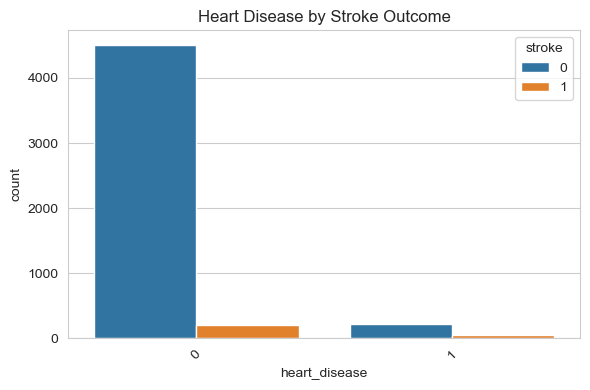

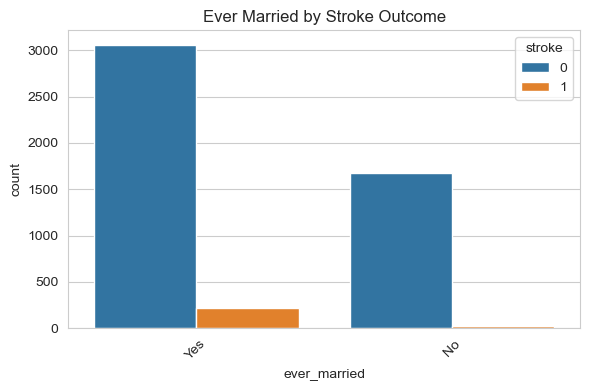

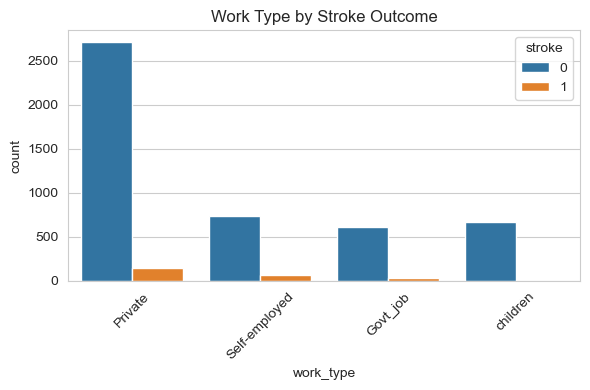

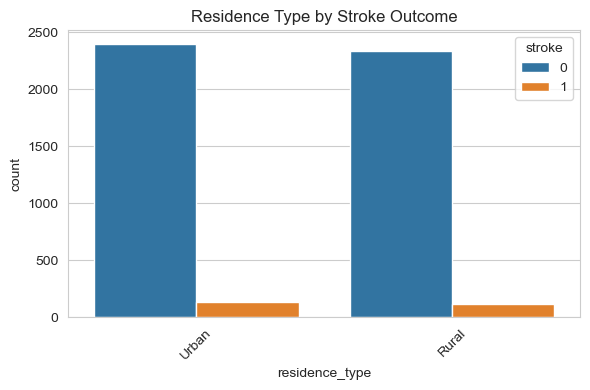

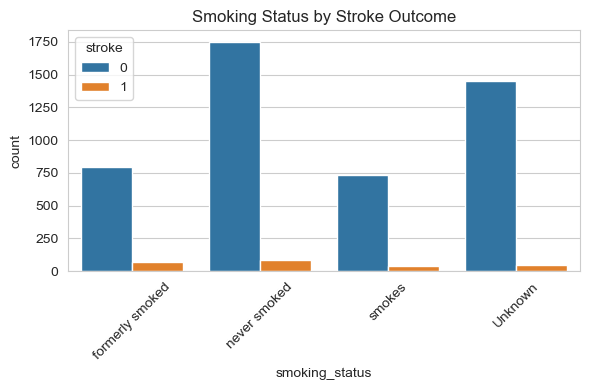

In [24]:
#Categorical feature countplots
cat_cols = [
    'gender', 'hypertension', 'heart_disease',
    'ever_married', 'work_type', 'residence_type', 'smoking_status'
]
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='stroke', data=stroke_data)
    plt.title(f"{col.replace('_',' ').title()} by Stroke Outcome")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

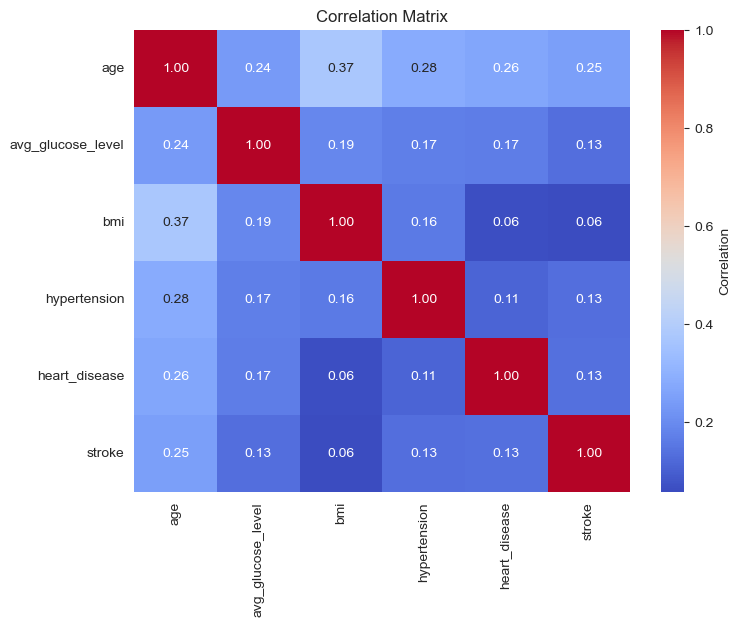

In [25]:
#Correlation matrix for numeric & binary features
plt.figure(figsize=(8, 6))
numeric = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']
corr = stroke_data[numeric].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label':'Correlation'})
plt.title("Correlation Matrix")
plt.show()

In [26]:
# Step 6: Outlier Identification & Winsorization

# Define continuous columns
cont_cols = ['age', 'avg_glucose_level', 'bmi']

# 6.1 Compute 1st & 99th percentiles
caps = {}
for col in cont_cols:
    lo = stroke_data[col].quantile(0.01)
    hi = stroke_data[col].quantile(0.99)
    caps[col] = (lo, hi)
    print(f"{col}:  1st percentile = {lo:.2f},  99th percentile = {hi:.2f}")

# 6.2 Apply winsorization (clipping)
stroke_wins = stroke_data.copy()
for col, (lo, hi) in caps.items():
    stroke_wins[col] = stroke_wins[col].clip(lower=lo, upper=hi)

# 6.3 Show summary after winsorization
display(
    stroke_wins[cont_cols]
    .describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
    .T
)


age:  1st percentile = 1.08,  99th percentile = 82.00
avg_glucose_level:  1st percentile = 56.33,  99th percentile = 240.82
bmi:  1st percentile = 15.50,  99th percentile = 45.50


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
age,4981.0,43.424429,22.654150,1.080,1.0800,5.00,25.00,45.00,61.00,79.0,82.000,82.00
avg_glucose_level,4981.0,105.841588,44.725028,56.328,56.3296,60.73,77.23,91.85,113.86,216.0,240.812,240.82
bmi,4981.0,28.488215,6.731591,15.500,15.5000,17.90,23.70,28.10,32.60,41.1,45.500,45.50
